<a href="https://colab.research.google.com/github/aniketsharma00411/MultiFairGAN/blob/main/Experiment%20Notebooks/MIMIC_fairness_epochs_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
! pip install -q fairlearn
from fairlearn.metrics import demographic_parity_ratio, demographic_parity_difference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


# Metric Evaluation

In [ ]:
iters = 20

data_dpr_eth_dict = {}
data_dpd_eth_dict = {}
data_dpr_ins_dict = {}
data_dpd_ins_dict = {}
aucpr_dict = {}
f1_dict = {}
dpr_eth_dict = {}
dpd_eth_dict = {}
dpr_ins_dict = {}
dpd_ins_dict = {}

In [ ]:
cat_features = ['gender', 'ethnicity', 'insurance', 'diagnosis_at_admission', 'discharge_location', 'admission_type']

##  Original Dataset

In [ ]:
orig = pd.read_csv('/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_TAB.csv')

for feat in cat_features:
    orig[feat] = LabelEncoder().fit_transform(orig[feat])

orig = orig.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

X = orig.drop(columns=['hospital_expire_flag'])
y = orig['hospital_expire_flag']

data_dpr_eth_dict['Real Data'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpd_eth_dict['Real Data'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpr_ins_dict['Real Data'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5
data_dpd_ins_dict['Real Data'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5

taucpr = 0
tf1 = 0
tdpr_eth = 0
tdpd_eth = 0
tdpr_ins = 0
tdpd_ins = 0
for i in range(iters):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    DT= DecisionTreeClassifier(random_state=i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    aucpr = average_precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
    dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

    taucpr += aucpr
    tf1 += f1
    tdpr_eth += dpr_eth
    tdpd_eth += dpd_eth
    tdpr_ins += dpr_ins
    tdpd_ins += dpd_ins

aucpr_dict['Real Data'] = [taucpr/iters]*5
f1_dict['Real Data'] = [tf1/iters]*5
dpr_eth_dict['Real Data'] = [tdpr_eth/iters]*5
dpd_eth_dict['Real Data'] = [tdpd_eth/iters]*5
dpr_ins_dict['Real Data'] = [tdpr_ins/iters]*5
dpd_ins_dict['Real Data'] = [tdpd_ins/iters]*5

##  CTGAN

In [ ]:
ctgan = pd.read_csv('/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan.csv')

for feat in cat_features:
    ctgan[feat] = LabelEncoder().fit_transform(ctgan[feat])

ctgan = ctgan.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

X = ctgan.drop(columns=['hospital_expire_flag'])
y = ctgan['hospital_expire_flag']

data_dpr_eth_dict['CTGAN'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpd_eth_dict['CTGAN'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpr_ins_dict['CTGAN'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5
data_dpd_ins_dict['CTGAN'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5

taucpr = 0
tf1 = 0
tdpr_eth = 0
tdpd_eth = 0
tdpr_ins = 0
tdpd_ins = 0
for i in range(iters):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    DT= DecisionTreeClassifier(random_state=i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    aucpr = average_precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
    dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

    taucpr += aucpr
    tf1 += f1
    tdpr_eth += dpr_eth
    tdpd_eth += dpd_eth
    tdpr_ins += dpr_ins
    tdpd_ins += dpd_ins

aucpr_dict['CTGAN'] = [taucpr/iters]*5
f1_dict['CTGAN'] = [tf1/iters]*5
dpr_eth_dict['CTGAN'] = [tdpr_eth/iters]*5
dpd_eth_dict['CTGAN'] = [tdpd_eth/iters]*5
dpr_ins_dict['CTGAN'] = [tdpr_ins/iters]*5
dpd_ins_dict['CTGAN'] = [tdpd_ins/iters]*5

##  TabFairGAN

In [ ]:
data_dpr_eth_dict['TabFairGAN'] = []
data_dpd_eth_dict['TabFairGAN'] = []
data_dpr_ins_dict['TabFairGAN'] = []
data_dpd_ins_dict['TabFairGAN'] = []
aucpr_dict['TabFairGAN'] = []
f1_dict['TabFairGAN'] = []
dpr_eth_dict['TabFairGAN'] = []
dpd_eth_dict['TabFairGAN'] = []
dpr_ins_dict['TabFairGAN'] = []
dpd_ins_dict['TabFairGAN'] = []

for i in ['10', '20', '30', '40', '50']:
    data = pd.read_csv(f'/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_tabfairgan_0.6_{i}.csv')

    for feat in cat_features:
        data[feat] = LabelEncoder().fit_transform(data[feat])

    data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

    X = data.drop(columns=['hospital_expire_flag'])
    y = data['hospital_expire_flag']

    data_dpr_eth_dict['TabFairGAN'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpd_eth_dict['TabFairGAN'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpr_ins_dict['TabFairGAN'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance']))
    data_dpd_ins_dict['TabFairGAN'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance']))

    taucpr = 0
    tf1 = 0
    tdpr_eth = 0
    tdpd_eth = 0
    tdpr_ins = 0
    tdpd_ins = 0
    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        DT= DecisionTreeClassifier(random_state=i)
        DT.fit(X_train, y_train)
        y_pred = DT.predict(X_test)

        aucpr = average_precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
        dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

        taucpr += aucpr
        tf1 += f1
        tdpr_eth += dpr_eth
        tdpd_eth += dpd_eth
        tdpr_ins += dpr_ins
        tdpd_ins += dpd_ins

    aucpr_dict['TabFairGAN'].append(taucpr/iters)
    f1_dict['TabFairGAN'].append(tf1/iters)
    dpr_eth_dict['TabFairGAN'].append(tdpr_eth/iters)
    dpd_eth_dict['TabFairGAN'].append(tdpd_eth/iters)
    dpr_ins_dict['TabFairGAN'].append(tdpr_ins/iters)
    dpd_ins_dict['TabFairGAN'].append(tdpd_ins/iters)

##  Distance Correlation GAN

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_distcorrGAN_0.1.csv')

for feat in cat_features:
    data[feat] = LabelEncoder().fit_transform(data[feat])

data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

X = data.drop(columns=['hospital_expire_flag'])
y = data['hospital_expire_flag']

data_dpr_eth_dict['Distance Correlation GAN'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpd_eth_dict['Distance Correlation GAN'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpr_ins_dict['Distance Correlation GAN'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5
data_dpd_ins_dict['Distance Correlation GAN'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5

taucpr = 0
tf1 = 0
tdpr_eth = 0
tdpd_eth = 0
tdpr_ins = 0
tdpd_ins = 0
for i in range(iters):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    DT= DecisionTreeClassifier(random_state=i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    aucpr = average_precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
    dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

    taucpr += aucpr
    tf1 += f1
    tdpr_eth += dpr_eth
    tdpd_eth += dpd_eth
    tdpr_ins += dpr_ins
    tdpd_ins += dpd_ins

aucpr_dict['Distance Correlation GAN'] = [taucpr/iters]*5
f1_dict['Distance Correlation GAN'] = [tf1/iters]*5
dpr_eth_dict['Distance Correlation GAN'] = [tdpr_eth/iters]*5
dpd_eth_dict['Distance Correlation GAN'] = [tdpd_eth/iters]*5
dpr_ins_dict['Distance Correlation GAN'] = [tdpr_ins/iters]*5
dpd_ins_dict['Distance Correlation GAN'] = [tdpd_ins/iters]*5

##  MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)

In [ ]:
data_dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
data_dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
data_dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
data_dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
aucpr_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
f1_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'] = []

for i in ['10', '20', '30', '40', '50']:
    data = pd.read_csv(f'/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan_dpr_0.2_{i}.csv')

    for feat in cat_features:
        data[feat] = LabelEncoder().fit_transform(data[feat])

    data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

    X = data.drop(columns=['hospital_expire_flag'])
    y = data['hospital_expire_flag']

    data_dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance']))
    data_dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance']))

    taucpr = 0
    tf1 = 0
    tdpr_eth = 0
    tdpd_eth = 0
    tdpr_ins = 0
    tdpd_ins = 0
    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        DT= DecisionTreeClassifier(random_state=i)
        DT.fit(X_train, y_train)
        y_pred = DT.predict(X_test)

        aucpr = average_precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
        dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

        taucpr += aucpr
        tf1 += f1
        tdpr_eth += dpr_eth
        tdpd_eth += dpd_eth
        tdpr_ins += dpr_ins
        tdpd_ins += dpd_ins

    aucpr_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(taucpr/iters)
    f1_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tf1/iters)
    dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tdpr_eth/iters)
    dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tdpd_eth/iters)
    dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tdpr_ins/iters)
    dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tdpd_ins/iters)

##  MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)

In [ ]:
data_dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
data_dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
data_dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
data_dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
aucpr_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
f1_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []
dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'] = []

for i in ['10', '20', '30', '40', '50']:
    data = pd.read_csv(f'/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan_dpd_0.2_{i}.csv')

    for feat in cat_features:
        data[feat] = LabelEncoder().fit_transform(data[feat])

    data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

    X = data.drop(columns=['hospital_expire_flag'])
    y = data['hospital_expire_flag']

    data_dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance']))
    data_dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance']))

    taucpr = 0
    tf1 = 0
    tdpr_eth = 0
    tdpd_eth = 0
    tdpr_ins = 0
    tdpd_ins = 0
    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        DT= DecisionTreeClassifier(random_state=i)
        DT.fit(X_train, y_train)
        y_pred = DT.predict(X_test)

        aucpr = average_precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
        dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

        taucpr += aucpr
        tf1 += f1
        tdpr_eth += dpr_eth
        tdpd_eth += dpd_eth
        tdpr_ins += dpr_ins
        tdpd_ins += dpd_ins

    aucpr_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(taucpr/iters)
    f1_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tf1/iters)
    dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tdpr_eth/iters)
    dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tdpd_eth/iters)
    dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tdpr_ins/iters)
    dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Two-cycle Strategy)'].append(tdpd_ins/iters)

##  MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan_dpr_additive_0.3_200.csv')

for feat in cat_features:
    data[feat] = LabelEncoder().fit_transform(data[feat])

data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

X = data.drop(columns=['hospital_expire_flag'])
y = data['hospital_expire_flag']

data_dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5
data_dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5

taucpr = 0
tf1 = 0
tdpr_eth = 0
tdpd_eth = 0
tdpr_ins = 0
tdpd_ins = 0
for i in range(iters):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    DT= DecisionTreeClassifier(random_state=i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    aucpr = average_precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
    dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

    taucpr += aucpr
    tf1 += f1
    tdpr_eth += dpr_eth
    tdpd_eth += dpd_eth
    tdpr_ins += dpr_ins
    tdpd_ins += dpd_ins

aucpr_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [taucpr/iters]*5
f1_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tf1/iters]*5
dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tdpr_eth/iters]*5
dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tdpd_eth/iters]*5
dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tdpr_ins/iters]*5
dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tdpd_ins/iters]*5

##  MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan_dpd_additive_0.1_200.csv')

for feat in cat_features:
    data[feat] = LabelEncoder().fit_transform(data[feat])

data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

X = data.drop(columns=['hospital_expire_flag'])
y = data['hospital_expire_flag']

data_dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5
data_dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5

taucpr = 0
tf1 = 0
tdpr_eth = 0
tdpd_eth = 0
tdpr_ins = 0
tdpd_ins = 0
for i in range(iters):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    DT= DecisionTreeClassifier(random_state=i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    aucpr = average_precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
    dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

    taucpr += aucpr
    tf1 += f1
    tdpr_eth += dpr_eth
    tdpd_eth += dpd_eth
    tdpr_ins += dpr_ins
    tdpd_ins += dpd_ins

aucpr_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [taucpr/iters]*5
f1_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tf1/iters]*5
dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tdpr_eth/iters]*5
dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tdpd_eth/iters]*5
dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tdpr_ins/iters]*5
dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity and Insurance) (Additive Fairness Loss Strategy)'] = [tdpd_ins/iters]*5

##  MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)

In [ ]:
data_dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
data_dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
data_dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
data_dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
aucpr_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
f1_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []
dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'] = []

for i in ['10', '20', '30', '40', '50']:
    data = pd.read_csv(f'/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan_dpr_0.4_{i}_ethnicity.csv')

    for feat in cat_features:
        data[feat] = LabelEncoder().fit_transform(data[feat])

    data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

    X = data.drop(columns=['hospital_expire_flag'])
    y = data['hospital_expire_flag']

    data_dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance']))
    data_dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance']))

    taucpr = 0
    tf1 = 0
    tdpr_eth = 0
    tdpd_eth = 0
    tdpr_ins = 0
    tdpd_ins = 0
    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        DT= DecisionTreeClassifier(random_state=i)
        DT.fit(X_train, y_train)
        y_pred = DT.predict(X_test)

        aucpr = average_precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
        dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

        taucpr += aucpr
        tf1 += f1
        tdpr_eth += dpr_eth
        tdpd_eth += dpd_eth
        tdpr_ins += dpr_ins
        tdpd_ins += dpd_ins

    aucpr_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(taucpr/iters)
    f1_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(tf1/iters)
    dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(tdpr_eth/iters)
    dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(tdpd_eth/iters)
    dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(tdpr_ins/iters)
    dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Two-cycle Strategy)'].append(tdpd_ins/iters)

##  MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)

In [ ]:
data_dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
data_dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
data_dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
data_dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
aucpr_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
f1_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []
dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'] = []

for i in ['10', '20', '30', '40', '50']:
    data = pd.read_csv(f'/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan_dpd_0.4_{i}_ethnicity.csv')

    for feat in cat_features:
        data[feat] = LabelEncoder().fit_transform(data[feat])

    data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

    X = data.drop(columns=['hospital_expire_flag'])
    y = data['hospital_expire_flag']

    data_dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity']))
    data_dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance']))
    data_dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance']))

    taucpr = 0
    tf1 = 0
    tdpr_eth = 0
    tdpd_eth = 0
    tdpr_ins = 0
    tdpd_ins = 0
    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        DT= DecisionTreeClassifier(random_state=i)
        DT.fit(X_train, y_train)
        y_pred = DT.predict(X_test)

        aucpr = average_precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
        dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
        dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

        taucpr += aucpr
        tf1 += f1
        tdpr_eth += dpr_eth
        tdpd_eth += dpd_eth
        tdpr_ins += dpr_ins
        tdpd_ins += dpd_ins

    aucpr_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(taucpr/iters)
    f1_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(tf1/iters)
    dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(tdpr_eth/iters)
    dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(tdpd_eth/iters)
    dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(tdpr_ins/iters)
    dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Two-cycle Strategy)'].append(tdpd_ins/iters)

##  MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan_dpr_additive_0.5_200.csv')

for feat in cat_features:
    data[feat] = LabelEncoder().fit_transform(data[feat])

data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

X = data.drop(columns=['hospital_expire_flag'])
y = data['hospital_expire_flag']

data_dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5
data_dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5

taucpr = 0
tf1 = 0
tdpr_eth = 0
tdpd_eth = 0
tdpr_ins = 0
tdpd_ins = 0
for i in range(iters):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    DT= DecisionTreeClassifier(random_state=i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    aucpr = average_precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
    dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

    taucpr += aucpr
    tf1 += f1
    tdpr_eth += dpr_eth
    tdpd_eth += dpd_eth
    tdpr_ins += dpr_ins
    tdpd_ins += dpd_ins

aucpr_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [taucpr/iters]*5
f1_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [tf1/iters]*5
dpr_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [tdpr_eth/iters]*5
dpd_eth_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [tdpd_eth/iters]*5
dpr_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [tdpr_ins/iters]*5
dpd_ins_dict['MultiFairGAN w/ DPR (Ethnicity) (Additive Fairness Loss Strategy)'] = [tdpd_ins/iters]*5

##  MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/TRAM - FairSyntheticData/Experiments/Data/MIMIC_ctgan_dpd_additive_0.4_200.csv')

for feat in cat_features:
    data[feat] = LabelEncoder().fit_transform(data[feat])

data = data.drop(columns=["dnr_first", "dnr","fullcode_first", "discharge_location","fullcode"])

X = data.drop(columns=['hospital_expire_flag'])
y = data['hospital_expire_flag']

data_dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['ethnicity'])]*5
data_dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [demographic_parity_ratio(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5
data_dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [demographic_parity_difference(y_true=y, y_pred=y, sensitive_features=X['insurance'])]*5

taucpr = 0
tf1 = 0
tdpr_eth = 0
tdpd_eth = 0
tdpr_ins = 0
tdpd_ins = 0
for i in range(iters):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    DT= DecisionTreeClassifier(random_state=i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)

    aucpr = average_precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dpr_eth = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpd_eth = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['ethnicity'])
    dpr_ins = demographic_parity_ratio(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])
    dpd_ins = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['insurance'])

    taucpr += aucpr
    tf1 += f1
    tdpr_eth += dpr_eth
    tdpd_eth += dpd_eth
    tdpr_ins += dpr_ins
    tdpd_ins += dpd_ins

aucpr_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [taucpr/iters]*5
f1_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [tf1/iters]*5
dpr_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [tdpr_eth/iters]*5
dpd_eth_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [tdpd_eth/iters]*5
dpr_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [tdpr_ins/iters]*5
dpd_ins_dict['MultiFairGAN w/ DPD (Ethnicity) (Additive Fairness Loss Strategy)'] = [tdpd_ins/iters]*5

## Results

In [ ]:
data_dpr_eth_df = pd.DataFrame(data_dpr_eth_dict, index=range(10, 60, 10))
data_dpd_eth_df = pd.DataFrame(data_dpd_eth_dict, index=range(10, 60, 10))
data_dpr_ins_df = pd.DataFrame(data_dpr_ins_dict, index=range(10, 60, 10))
data_dpd_ins_df = pd.DataFrame(data_dpd_ins_dict, index=range(10, 60, 10))
aucpr_df = pd.DataFrame(aucpr_dict, index=range(10, 60, 10))
f1_df = pd.DataFrame(f1_dict, index=range(10, 60, 10))
dpr_eth_df = pd.DataFrame(dpr_eth_dict, index=range(10, 60, 10))
dpd_eth_df = pd.DataFrame(dpd_eth_dict, index=range(10, 60, 10))
dpr_ins_df = pd.DataFrame(dpr_ins_dict, index=range(10, 60, 10))
dpd_ins_df = pd.DataFrame(dpd_ins_dict, index=range(10, 60, 10))

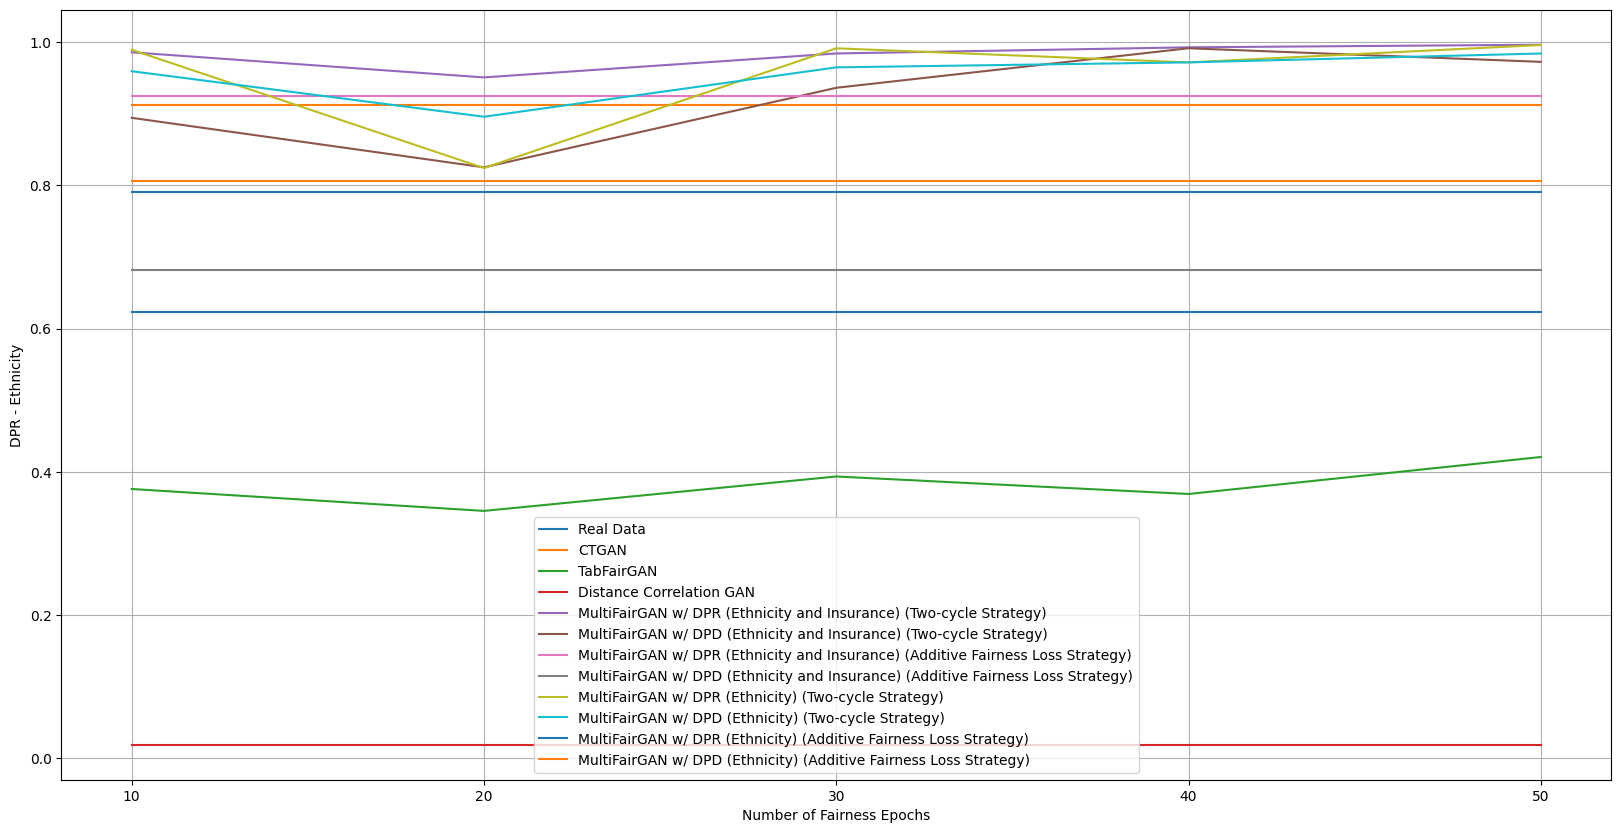

In [ ]:
data_dpr_eth_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('DPR - Ethnicity')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

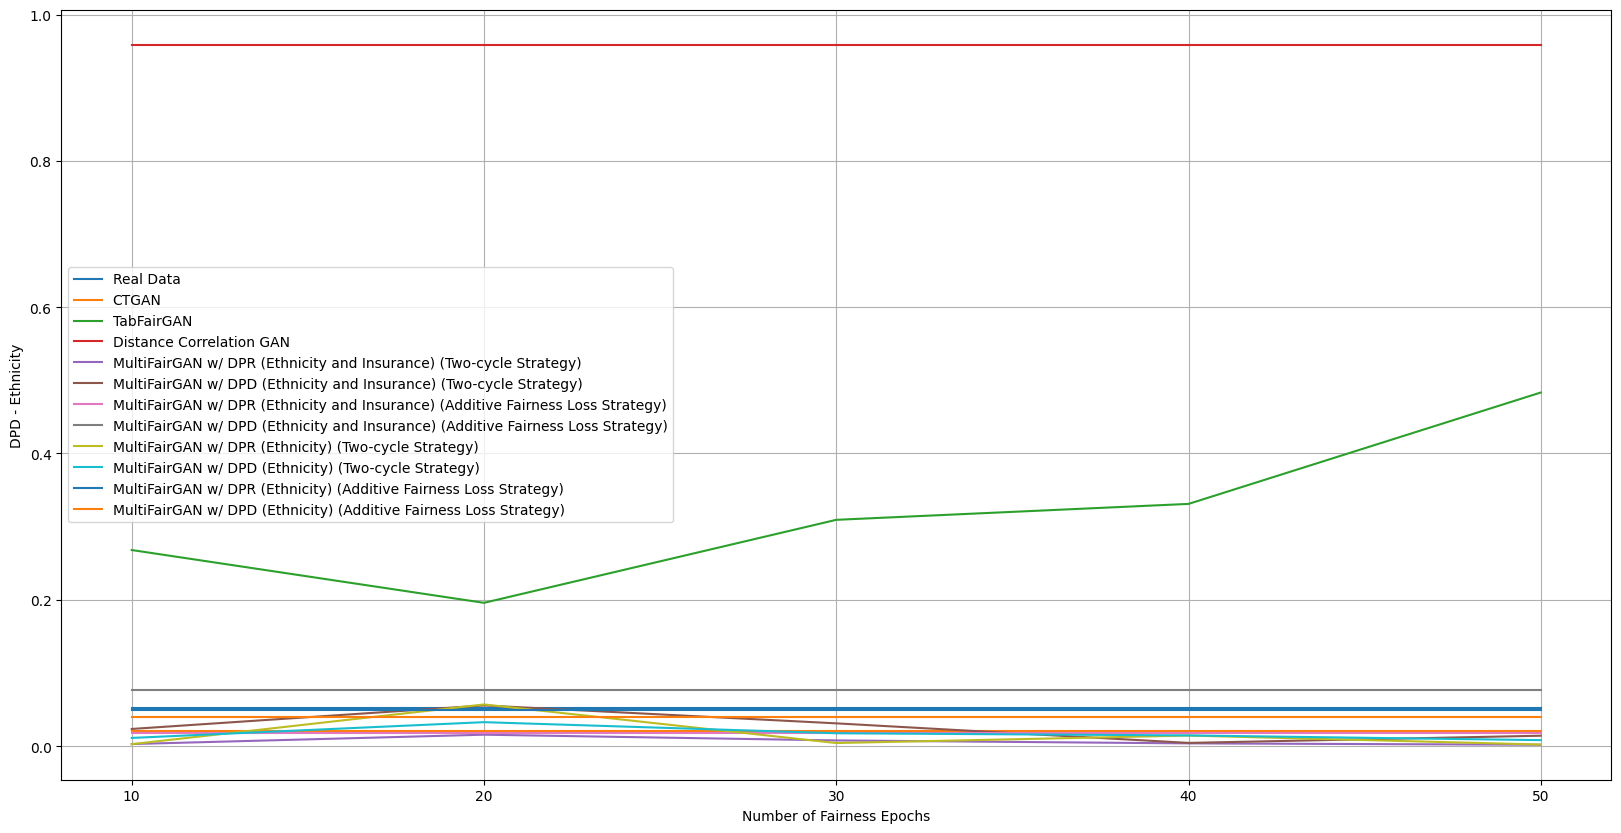

In [ ]:
data_dpd_eth_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('DPD - Ethnicity')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

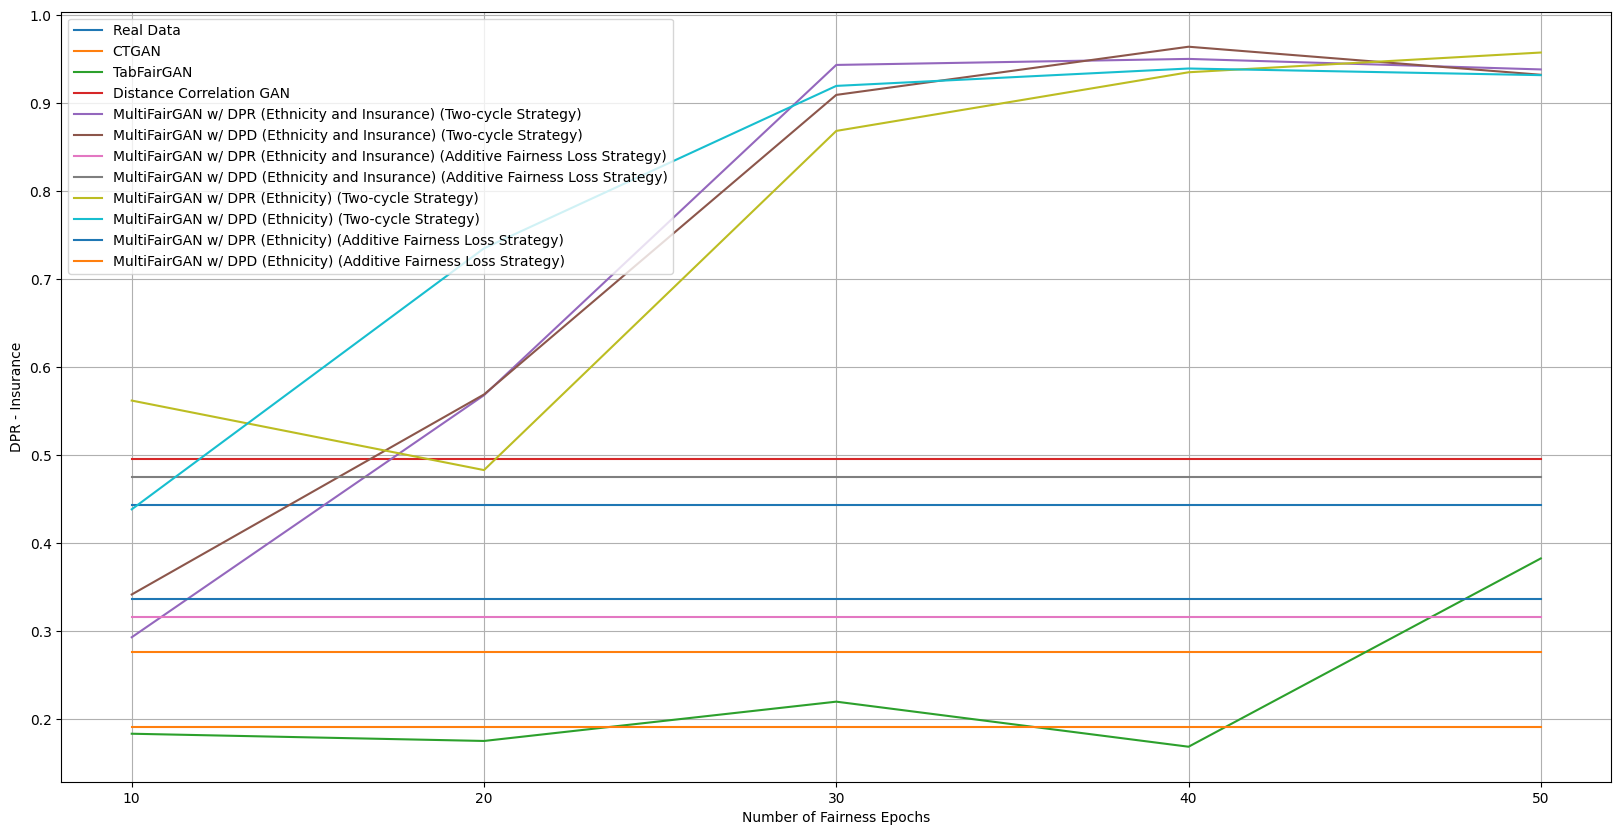

In [ ]:
data_dpr_ins_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('DPR - Insurance')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

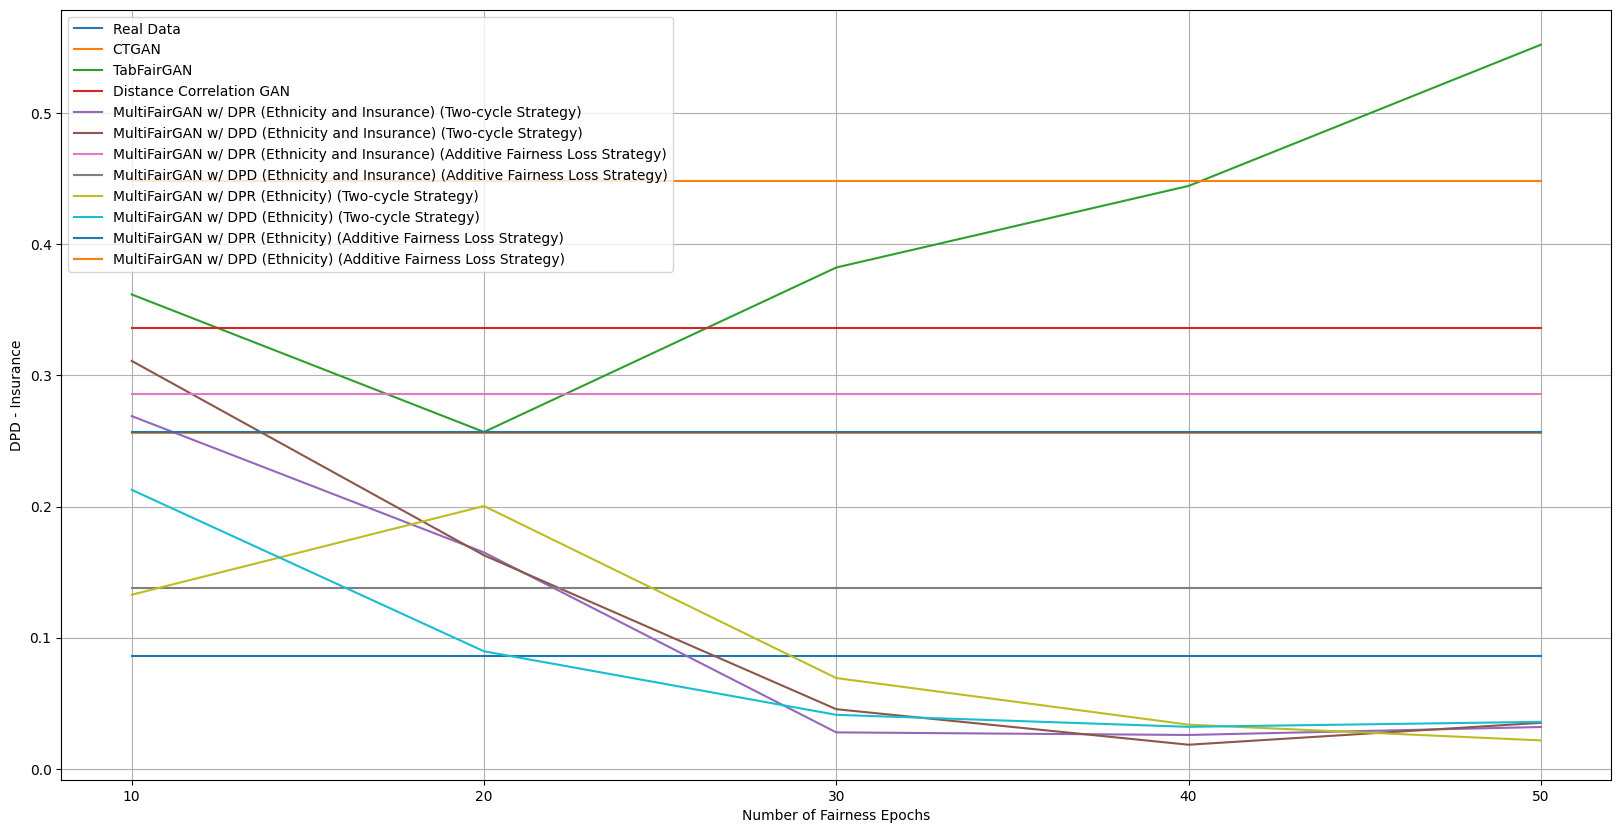

In [ ]:
data_dpd_ins_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('DPD - Insurance')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

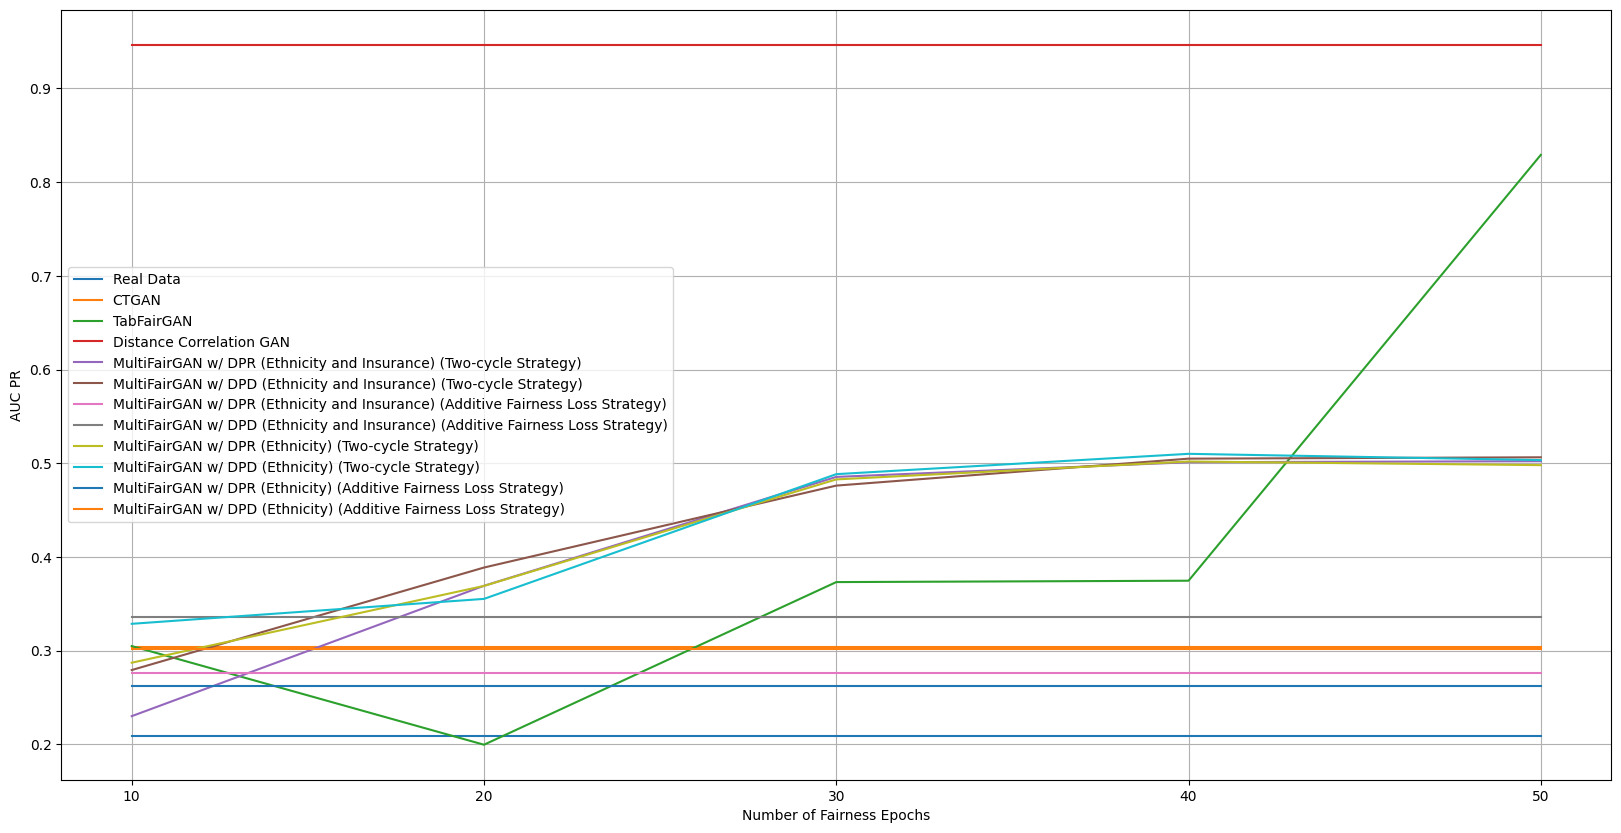

In [ ]:
aucpr_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('AUC PR')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

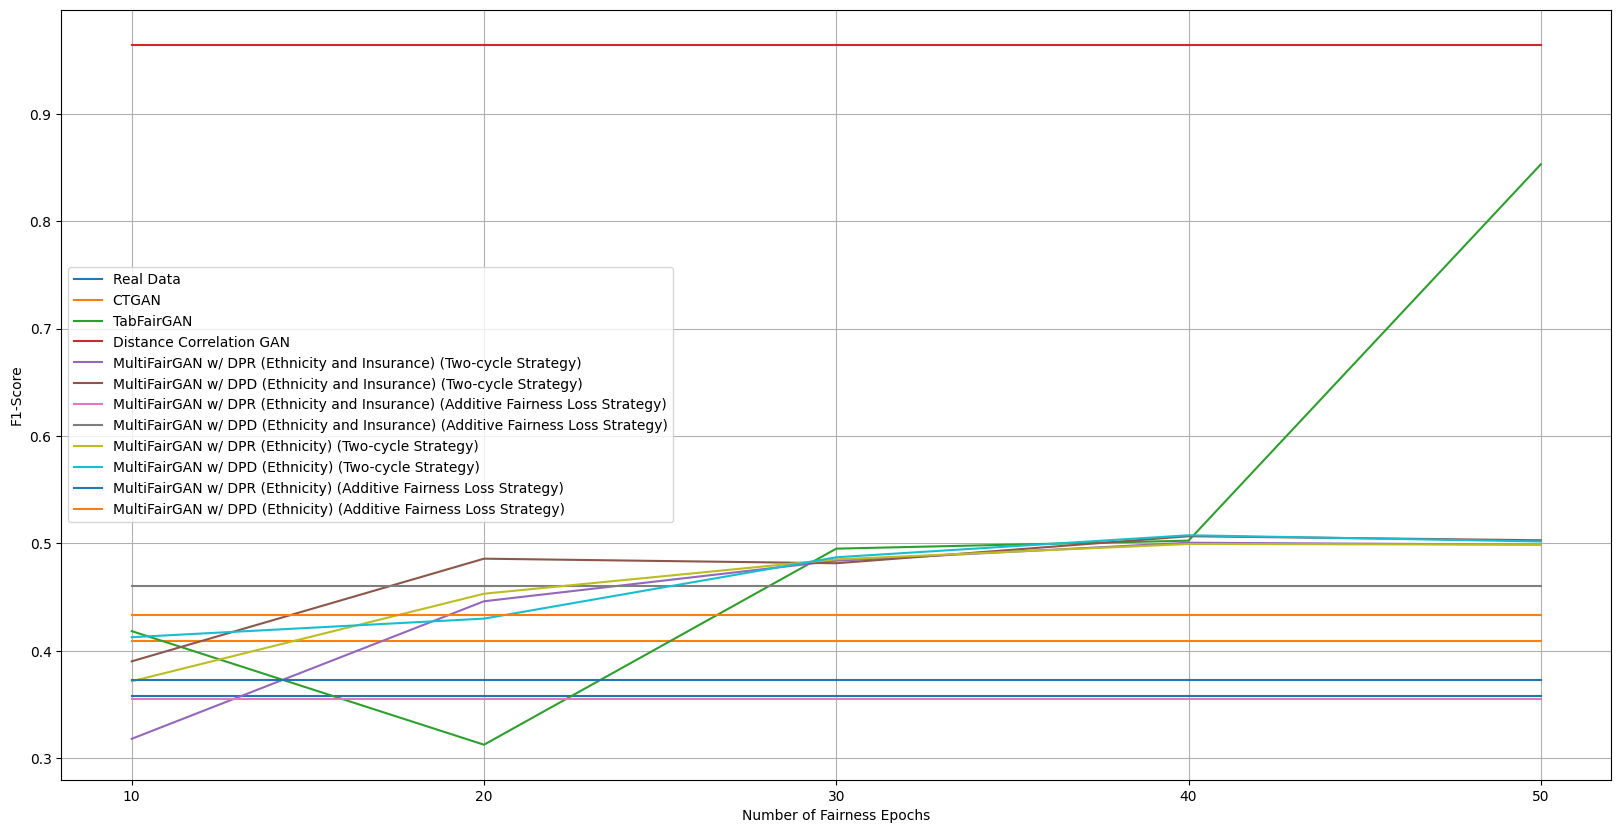

In [ ]:
f1_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('F1-Score')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

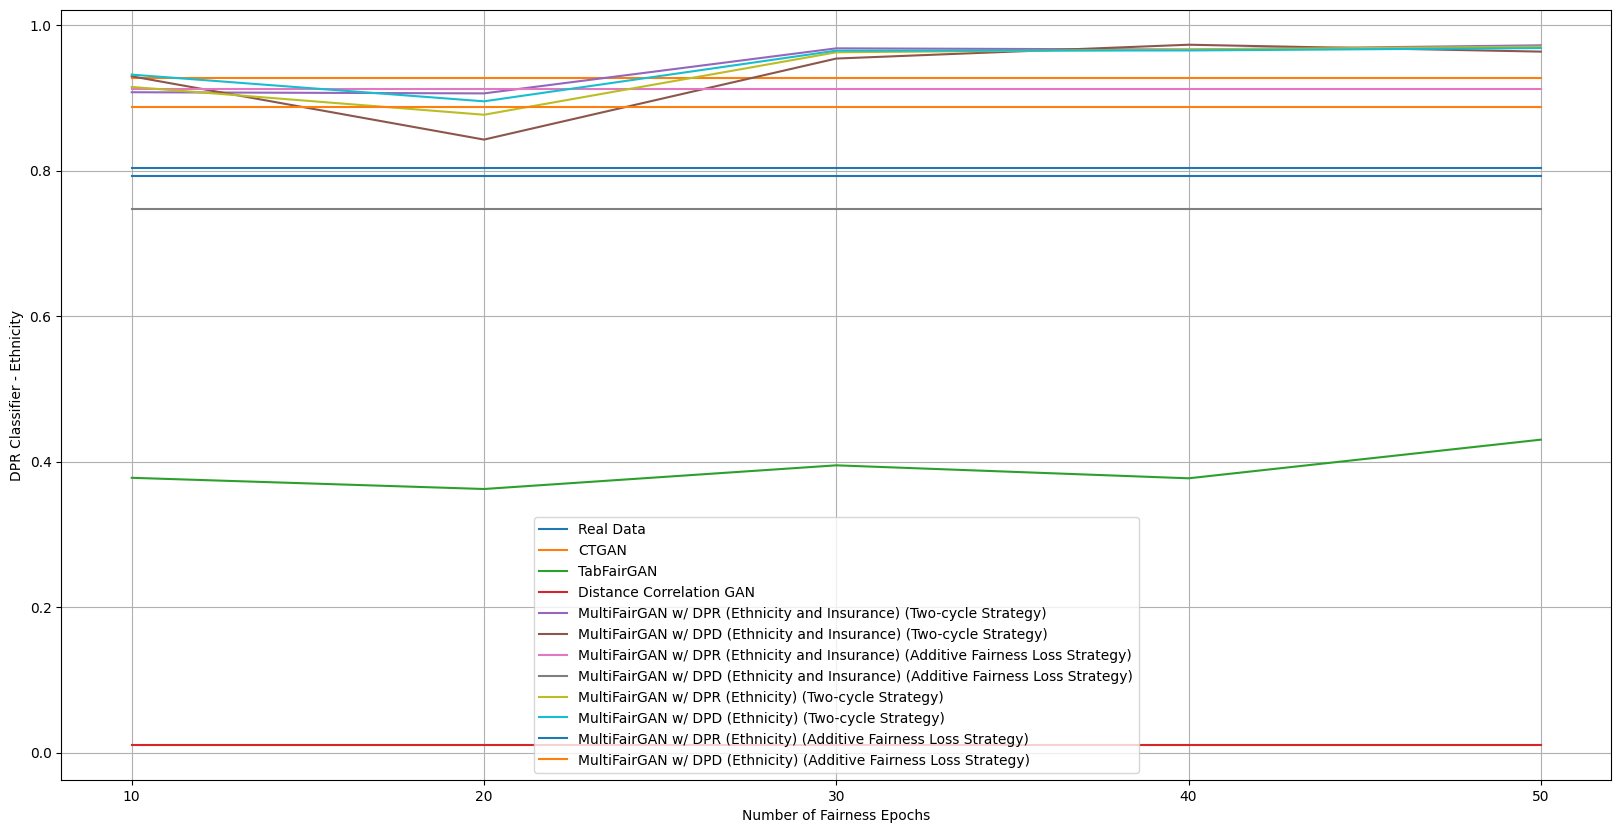

In [ ]:
dpr_eth_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('DPR Classifier - Ethnicity')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

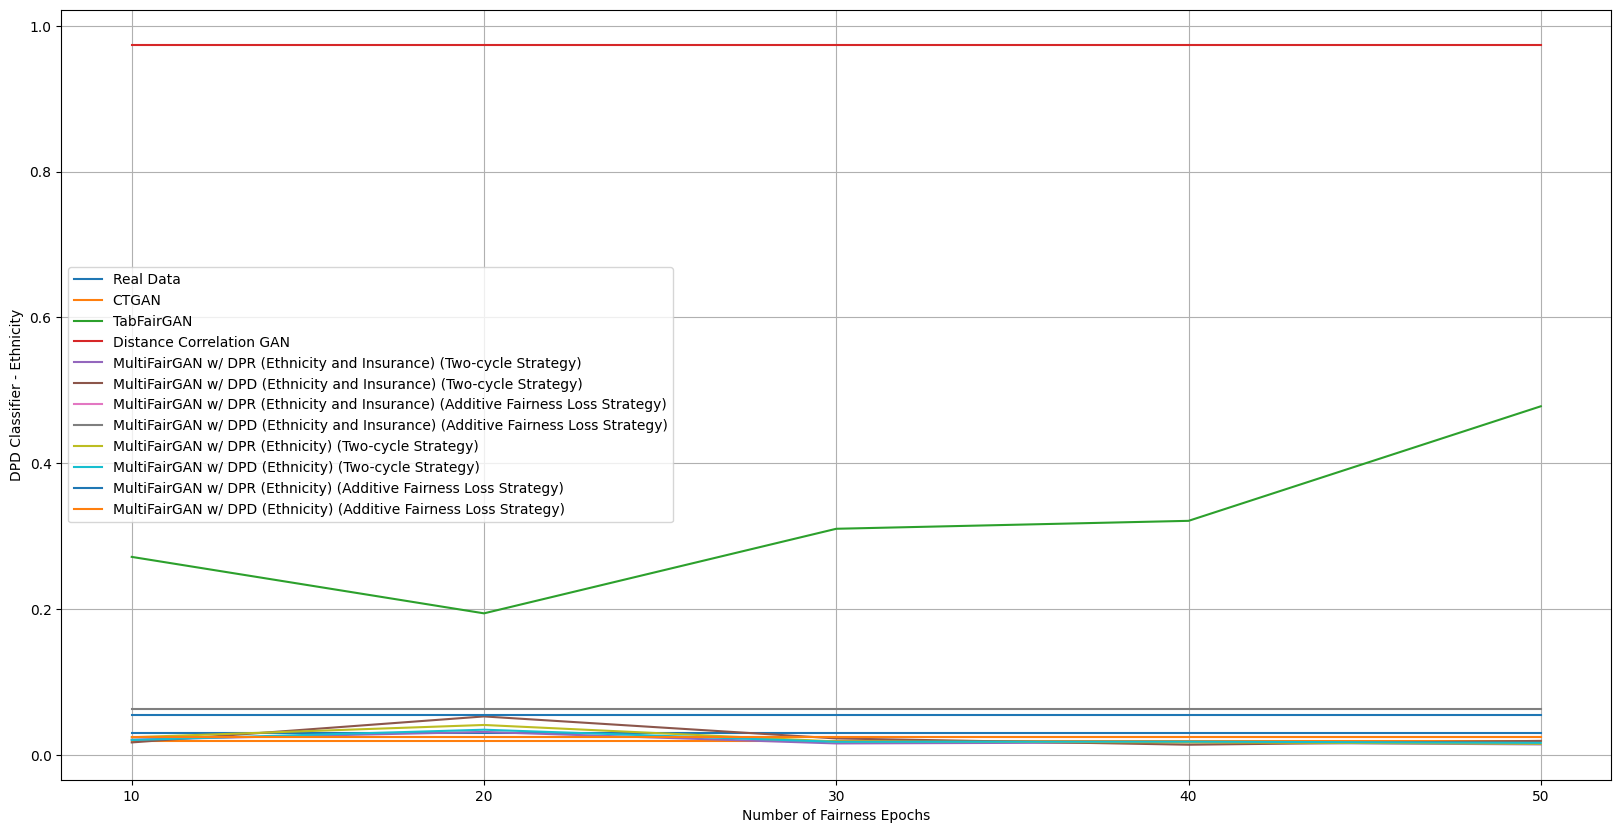

In [ ]:
dpd_eth_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('DPD Classifier - Ethnicity')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

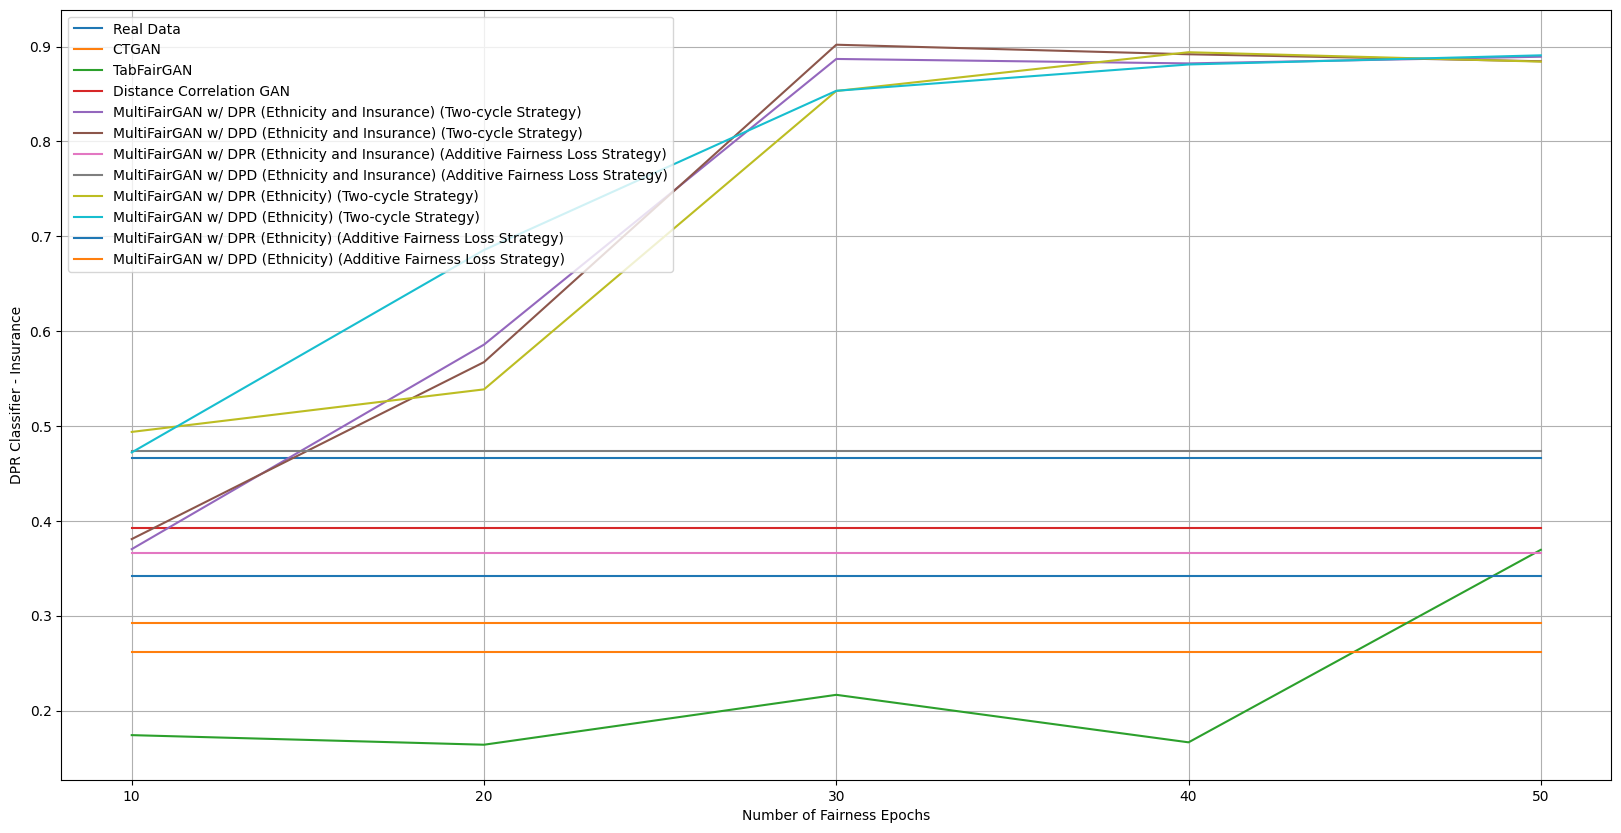

In [ ]:
dpr_ins_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('DPR Classifier - Insurance')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()

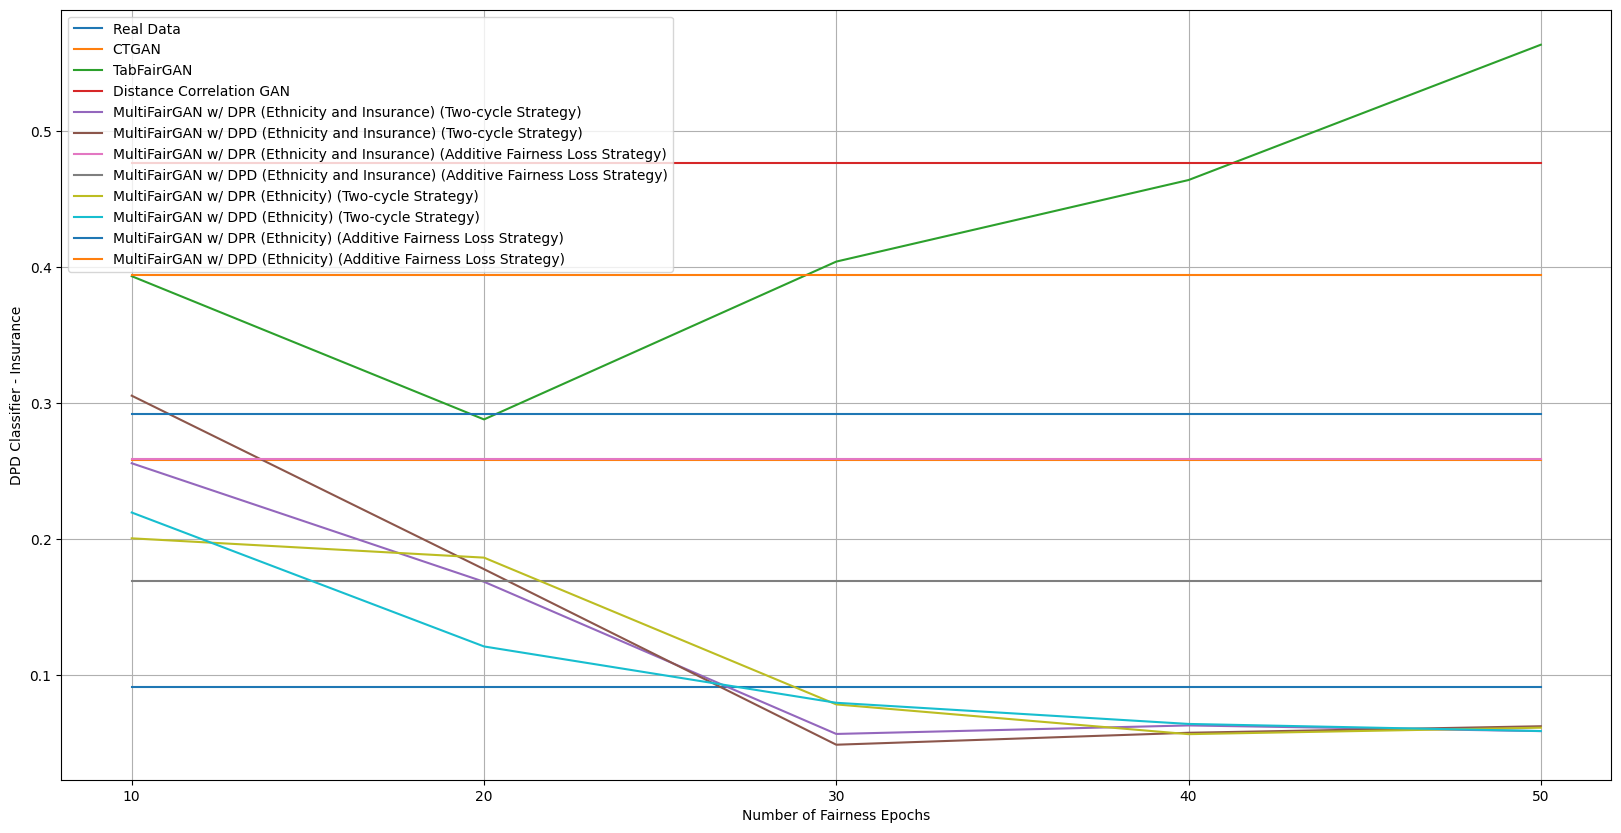

In [ ]:
dpd_ins_df.plot(grid=True, figsize=(20,10))
plt.xlabel('Number of Fairness Epochs')
plt.ylabel('DPD Classifier - Insurance')
plt.xticks(range(10, 60, 10), ['10', '20', '30', '40', '50'])
plt.show()